In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
cities_df= pd.DataFrame(columns =["Latitude","Longitude","City", "Country","Temperature (F)","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"])
lat = []
lng = []
cities=[]
countries=[]
for x in range(0,1500):
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-180,180))
cities_df["Latitude"]=lat
cities_df["Longitude"]=lng

for index, row in cities_df.iterrows():
    city=citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities.append(city.city_name)
    countries.append(city.country_code)
cities_df['City']=cities
cities_df['Country']=countries
cities_df.head()

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,-69.290139,42.082458,port alfred,za,NaN,NaN,NaN,NaN
1,-56.213805,154.847451,hobart,au,NaN,NaN,NaN,NaN
2,52.736917,9.172552,nienburg,de,NaN,NaN,NaN,NaN
3,-14.621661,106.832063,kawalu,id,NaN,NaN,NaN,NaN
4,-77.125596,-164.309607,mataura,pf,NaN,NaN,NaN,NaN


In [4]:
new_dataframe = cities_df.drop_duplicates("City",keep="first")
len(new_dataframe)

620

In [5]:
temp = []
humidity =[]
clouds = []
wind = []

counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
city=row["City"]
units = "imperial"

for index, row in new_dataframe.iterrows():
    counter +=1
    city = row["City"]
    target_url = f"{url}appid={api_key}&q={city}&units={units}"
    print("This is city number "+str(counter))
    print("The name of the city is "+row["City"])
    print(target_url)
    print("__________________________________________________________________________________________")
    info = requests.get(target_url).json()
    if info["cod"]=="404":
        print("City not found, skipping...")
    else:
        new_dataframe.at[index,"Temperature (F)"]= info["main"]["temp"]
        new_dataframe.at[index,"Humidity (%)"]=info["main"]["humidity"]
        new_dataframe.at[index,"Cloudiness (%)"]=info["clouds"]["all"]
        new_dataframe.at[index,"Wind Speed (mph)"]=info["wind"]["speed"]

This is city number 1
The name of the city is port alfred
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=port alfred&units=imperial
__________________________________________________________________________________________
This is city number 2
The name of the city is hobart
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=hobart&units=imperial
__________________________________________________________________________________________
This is city number 3
The name of the city is nienburg
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=nienburg&units=imperial
__________________________________________________________________________________________
This is city number 4
The name of the city is kawalu
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=kawalu&units=imperial
_____________________________________________________________

This is city number 34
The name of the city is laguna
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=laguna&units=imperial
__________________________________________________________________________________________
This is city number 35
The name of the city is porto novo
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=porto novo&units=imperial
__________________________________________________________________________________________
This is city number 36
The name of the city is kavieng
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=kavieng&units=imperial
__________________________________________________________________________________________
This is city number 37
The name of the city is ayorou
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=ayorou&units=imperial
_____________________________________________________________

This is city number 68
The name of the city is trairi
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=trairi&units=imperial
__________________________________________________________________________________________
This is city number 69
The name of the city is cukai
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=cukai&units=imperial
__________________________________________________________________________________________
This is city number 70
The name of the city is kununurra
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=kununurra&units=imperial
__________________________________________________________________________________________
This is city number 71
The name of the city is aswan
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=aswan&units=imperial
_____________________________________________________________________

City not found, skipping...
This is city number 99
The name of the city is hasaki
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=hasaki&units=imperial
__________________________________________________________________________________________
This is city number 100
The name of the city is setermoen
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=setermoen&units=imperial
__________________________________________________________________________________________
This is city number 101
The name of the city is sinop
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=sinop&units=imperial
__________________________________________________________________________________________
This is city number 102
The name of the city is goycay
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=goycay&units=imperial
____________________________________

This is city number 130
The name of the city is bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=bengkulu&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 131
The name of the city is aksarka
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=aksarka&units=imperial
__________________________________________________________________________________________
This is city number 132
The name of the city is kenai
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=kenai&units=imperial
__________________________________________________________________________________________
This is city number 133
The name of the city is clyde river
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=clyde river&units=imperial
_________________________

This is city number 164
The name of the city is natal
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=natal&units=imperial
__________________________________________________________________________________________
This is city number 165
The name of the city is saint-leu
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=saint-leu&units=imperial
__________________________________________________________________________________________
This is city number 166
The name of the city is bethel
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=bethel&units=imperial
__________________________________________________________________________________________
This is city number 167
The name of the city is coihaique
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=coihaique&units=imperial
_________________________________________________________

This is city number 195
The name of the city is kahului
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=kahului&units=imperial
__________________________________________________________________________________________
This is city number 196
The name of the city is boueni
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=boueni&units=imperial
__________________________________________________________________________________________
This is city number 197
The name of the city is verkhnyachka
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=verkhnyachka&units=imperial
__________________________________________________________________________________________
This is city number 198
The name of the city is vostok
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=vostok&units=imperial
_____________________________________________________

This is city number 228
The name of the city is cayenne
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=cayenne&units=imperial
__________________________________________________________________________________________
This is city number 229
The name of the city is butaritari
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=butaritari&units=imperial
__________________________________________________________________________________________
This is city number 230
The name of the city is lang son
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=lang son&units=imperial
__________________________________________________________________________________________
This is city number 231
The name of the city is batie
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=batie&units=imperial
_______________________________________________________

This is city number 261
The name of the city is leh
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=leh&units=imperial
__________________________________________________________________________________________
This is city number 262
The name of the city is bacolod
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=bacolod&units=imperial
__________________________________________________________________________________________
This is city number 263
The name of the city is seoul
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=seoul&units=imperial
__________________________________________________________________________________________
This is city number 264
The name of the city is san luis
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=san luis&units=imperial
_____________________________________________________________________

This is city number 293
The name of the city is aklavik
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=aklavik&units=imperial
__________________________________________________________________________________________
This is city number 294
The name of the city is senneterre
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=senneterre&units=imperial
__________________________________________________________________________________________
This is city number 295
The name of the city is alofi
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=alofi&units=imperial
__________________________________________________________________________________________
This is city number 296
The name of the city is nesterov
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=nesterov&units=imperial
_______________________________________________________

This is city number 326
The name of the city is fare
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=fare&units=imperial
__________________________________________________________________________________________
This is city number 327
The name of the city is samarai
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=samarai&units=imperial
__________________________________________________________________________________________
This is city number 328
The name of the city is nome
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=nome&units=imperial
__________________________________________________________________________________________
This is city number 329
The name of the city is sorvag
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=sorvag&units=imperial
_________________________________________________________________________

This is city number 360
The name of the city is saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=saint-pierre&units=imperial
__________________________________________________________________________________________
This is city number 361
The name of the city is amderma
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=amderma&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 362
The name of the city is salalah
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=salalah&units=imperial
__________________________________________________________________________________________
This is city number 363
The name of the city is juba
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=juba&units=imperial
___________________________

This is city number 392
The name of the city is lorengau
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=lorengau&units=imperial
__________________________________________________________________________________________
This is city number 393
The name of the city is tyup
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=tyup&units=imperial
__________________________________________________________________________________________
This is city number 394
The name of the city is simao
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=simao&units=imperial
__________________________________________________________________________________________
This is city number 395
The name of the city is nantucket
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=nantucket&units=imperial
_______________________________________________________________

This is city number 425
The name of the city is cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=cherskiy&units=imperial
__________________________________________________________________________________________
This is city number 426
The name of the city is cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=cabo san lucas&units=imperial
__________________________________________________________________________________________
This is city number 427
The name of the city is mariahu
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=mariahu&units=imperial
__________________________________________________________________________________________
This is city number 428
The name of the city is palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=palabuhanratu&units=imperial
_______________________________

This is city number 456
The name of the city is chuy
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=chuy&units=imperial
__________________________________________________________________________________________
This is city number 457
The name of the city is providencia
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=providencia&units=imperial
__________________________________________________________________________________________
This is city number 458
The name of the city is louisbourg
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=louisbourg&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 459
The name of the city is nong phai
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=nong phai&units=imperial
___________________

This is city number 489
The name of the city is manaure
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=manaure&units=imperial
__________________________________________________________________________________________
This is city number 490
The name of the city is northam
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=northam&units=imperial
__________________________________________________________________________________________
This is city number 491
The name of the city is hirara
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=hirara&units=imperial
__________________________________________________________________________________________
This is city number 492
The name of the city is agadez
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=agadez&units=imperial
_______________________________________________________________

This is city number 521
The name of the city is zimovniki
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=zimovniki&units=imperial
__________________________________________________________________________________________
This is city number 522
The name of the city is puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=puerto del rosario&units=imperial
__________________________________________________________________________________________
This is city number 523
The name of the city is tommot
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=tommot&units=imperial
__________________________________________________________________________________________
This is city number 524
The name of the city is agen
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=agen&units=imperial
_________________________________________

This is city number 554
The name of the city is atar
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=atar&units=imperial
__________________________________________________________________________________________
This is city number 555
The name of the city is campechuela
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=campechuela&units=imperial
__________________________________________________________________________________________
This is city number 556
The name of the city is teya
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=teya&units=imperial
__________________________________________________________________________________________
This is city number 557
The name of the city is turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=turukhansk&units=imperial
_________________________________________________________

This is city number 586
The name of the city is petauke
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=petauke&units=imperial
__________________________________________________________________________________________
This is city number 587
The name of the city is tambura
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=tambura&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 588
The name of the city is karymskoye
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=karymskoye&units=imperial
__________________________________________________________________________________________
This is city number 589
The name of the city is tezu
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=tezu&units=imperial
_______________________________

This is city number 618
The name of the city is sumbe
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=sumbe&units=imperial
__________________________________________________________________________________________
This is city number 619
The name of the city is san-pedro
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=san-pedro&units=imperial
__________________________________________________________________________________________
This is city number 620
The name of the city is polillo
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=polillo&units=imperial
__________________________________________________________________________________________


In [6]:
new_dataframe.dropna()
new_dataframe.reset_index()

,index,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,0,-69.290139,42.082458,port alfred,za,61.93,89,92,5.61
1,1,-56.213805,154.847451,hobart,au,46.4,65,20,10.29
2,2,52.736917,9.172552,nienburg,de,46.4,81,0,10.29
3,3,-14.621661,106.832063,kawalu,id,64.65,98,68,1.7
4,4,-77.125596,-164.309607,mataura,pf,54.91,66,92,22.39
5,5,-5.116749,93.855349,padang,id,79.21,100,32,1.03
6,6,-65.549800,60.934228,taolanaro,mg,NaN,NaN,NaN,NaN
7,7,-81.853195,34.835984,port elizabeth,za,75.9,59,1,3.36
8,8,-19.598134,94.623015,labuhan,id,76.26,89,20,2.93
9,9,88.252041,106.218472,khatanga,ru,29.44,86,80,10.76


In [7]:
date = time.strftime("%m/%d/%Y")

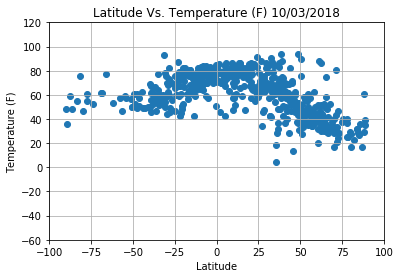

In [27]:
#Latitude vs Temperature Scatter Plot
plt.scatter(new_dataframe["Latitude"],new_dataframe["Temperature (F)"],marker ="o")
plt.title(f"Latitude Vs. Temperature (F) {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim([-100, 100])
plt.ylim([-60, 120])
plt.grid(True)
plt.savefig("Temperature.png")

plt.show()

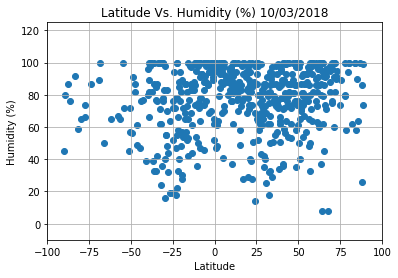

In [33]:
#Latitude vs Humidity Scatter Plot
plt.scatter(new_dataframe["Latitude"],new_dataframe["Humidity (%)"],marker ="o")
plt.title(f"Latitude Vs. Humidity (%) {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim([-100, 100])
plt.ylim([-10, 125])
plt.grid(True)
plt.savefig("Humidity.png")

plt.show()

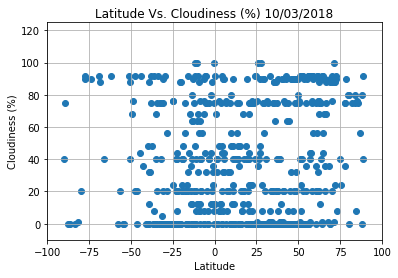

In [34]:
#Latitude vs Cloudiness Scatter Plot
plt.scatter(new_dataframe["Latitude"],new_dataframe["Cloudiness (%)"],marker ="o")
plt.title(f"Latitude Vs. Cloudiness (%) {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim([-100, 100])
plt.ylim([-10, 125])
plt.grid(True)
plt.savefig("Cloudiness.png")

plt.show()

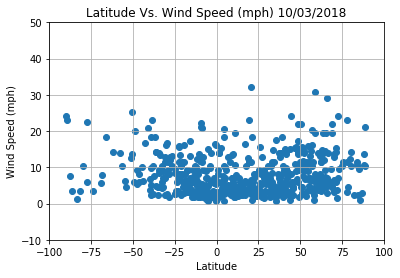

In [35]:
# Latitude vs Wind Speed Scatter Plot
plt.scatter(new_dataframe["Latitude"], new_dataframe["Wind Speed (mph)"], marker="o")
plt.title(f"Latitude Vs. Wind Speed (mph) {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim([-100, 100])
plt.ylim([-10, 50])
plt.grid(True)
plt.savefig("Windspeed.png")

plt.show()